# Business Analytics Model: Customer Segmentation

## Step-by-Step Plan for Customer Segmentation Model
### Step 1: Import Libraries, Load and Inspect the Dataset
- Load necessary libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn modules for preprocessing, clustering, and evaluation.
- Load the cleaned dataset 'Cleaned_Customer_Segmentation.csv'.
- Display the dataset's first few rows, basic information, and summary statistics to understand the structure and content.
### Step 2: Features Selection and Correlation Visualization
- Select relevant features for clustering, excluding non-scaled features like Customer_Age.
- View the correlation matrix of the selected features.
### Step 3: Determine Optimal Clusters
- Use the Elbow Method to identify the optimal number of clusters (k).
- Plot the inertia for different k values and choose the "elbow point" where inertia reduction slows.
### Step 4: Build the Clustering Model
- Apply K-Means clustering using the chosen number of clusters.
- Assign cluster labels to each customer and add these labels to the original dataset.
### Step 5: Analyze Clusters
- Visualize cluster distribution across customer age groups using a count plot.
- Use a scatter plot to analyze relationships between Revenue and Profit within clusters.
### Step 6: Evaluate Model Performance
- Compute the Silhouette Score to measure cluster cohesion and separation, ensuring the clusters are well-defined.
### Step 7: Save Results
- Save the updated dataset with cluster labels as 'Segmented_Customers.csv'.

## Import Libraries, Load and Inspect the Dataset

In [152]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load and Inspect the Data
# Load the cleaned dataset
data = pd.read_csv("Cleaned_Customer_Segmentation.csv")

# Display first few rows of the dataset
print("Dataset Overview:")
data.head()

Dataset Overview:


,Date,Month,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Spending_Group
0,26/11/2013,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,Low
1,26/11/2015,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,Low
2,23/03/2014,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,0.709677,0.020276,0.032998,0.092291,0.024059,0.041311,High
3,23/03/2016,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,0.612903,0.020276,0.032998,0.080524,0.020918,0.035921,High
4,15/05/2014,May,47,Adults (35-64),F,Australia,Accessories,Bike Racks,0.096774,0.020276,0.032998,0.017718,0.004165,0.007164,Very Low


In [77]:
# Display basic information about the dataset
print("\nDataset Information:")
data.info()

# Display summary statistics of the dataset
print("\nSummary Statistics:")
data.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112036 entries, 0 to 112035
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Date                     112036 non-null  object 
 1   Month                    112036 non-null  object 
 2   Customer_Age             112036 non-null  int64  
 3   Age_Group                112036 non-null  object 
 4   Customer_Gender          112036 non-null  object 
 5   Country                  112036 non-null  object 
 6   Product_Category         112036 non-null  object 
 7   Sub_Category             112036 non-null  object 
 8   Order_Quantity           112036 non-null  float64
 9   Unit_Cost                112036 non-null  float64
 10  Unit_Price               112036 non-null  float64
 11  Profit                   112036 non-null  float64
 12  Cost                     112036 non-null  float64
 13  Revenue                  112036 non-n

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,35.919508,0.351750,0.122958,0.126356,0.020894,0.010938,0.013003
std,11.016543,0.308544,0.253557,0.258040,0.030071,0.020638,0.022594
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.032258,0.000461,0.000839,0.003901,0.000628,0.001068
50%,35.000000,0.290323,0.003687,0.006432,0.008793,0.002583,0.003857
75%,43.000000,0.612903,0.018894,0.019016,0.025783,0.010261,0.013845
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Features Selection and Correlation Visualization

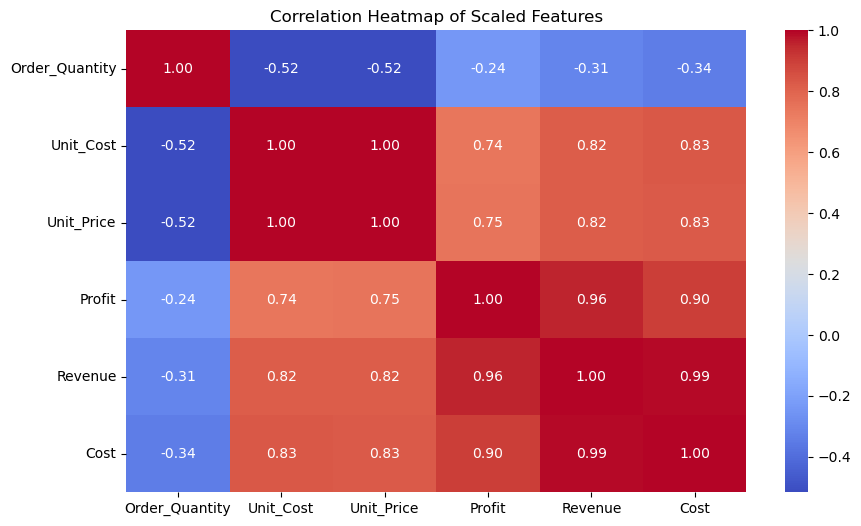

In [174]:
# Select features for clustering
features = ['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Revenue', 'Cost']
X = data[features].copy()

# Calculate the correlation matrix
corr_matrix = X[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap of Scaled Features")
plt.show()

The heatmap shows a strong positive correlation between Revenue and Cost, Unit Cost and Unit Price, as well as Revenue and Profit, indicating that increased revenue directly impacts both cost and profitability. However, Order Quantity shows minimal correlation with the other variables, suggesting that Order Quantity has a limited direct relationship with Revenue, Cost, or Profit. This implies that while higher order volumes might not significantly influence these metrics, other factors such as pricing and cost structure play a more critical role in driving revenue and profitability. This insight can guide strategic decisions to optimize pricing and cost management rather than focusing solely on increasing order volumes.

## Determine Optimal Clusters

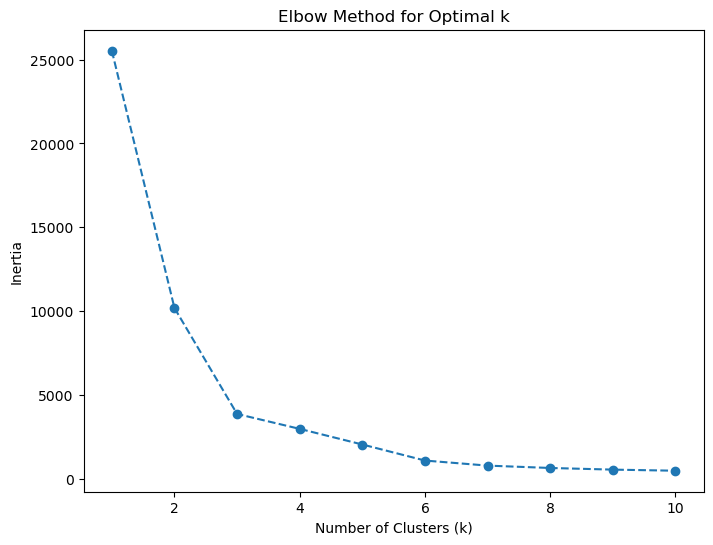

In [156]:
# Use the elbow method to find the best number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

The elbow plot for determining the optimal number of clusters indicates that k=3 is the ideal choice, as evidenced by a clear "elbow" at this point. The inertia decreases rapidly as k increases from 1 to 3, after which the rate of decrease slows significantly. Although k=4 continues to show a slight reduction in inertia, the diminishing returns beyond k=3 suggest that further increasing the number of clusters does not meaningfully improve the model's fit. This behavior suggests that a cluster count of 3 strikes the best balance between simplicity and effective clustering, aligning with the silhouette score of 0.60, which confirms a good level of cluster cohesion and separation.

## Build the Customer Segmentation Model

In [160]:
# From the elbow plot, choose the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Add the new cluster labels to the original dataset
data['Cluster'] = X['Cluster']
data.head()

,Date,Month,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Spending_Group,Cluster
0,26/11/2013,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,Low,0
1,26/11/2015,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,Low,0
2,23/03/2014,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,0.709677,0.020276,0.032998,0.092291,0.024059,0.041311,High,1
3,23/03/2016,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,0.612903,0.020276,0.032998,0.080524,0.020918,0.035921,High,1
4,15/05/2014,May,47,Adults (35-64),F,Australia,Accessories,Bike Racks,0.096774,0.020276,0.032998,0.017718,0.004165,0.007164,Very Low,0


## Analyze clusters

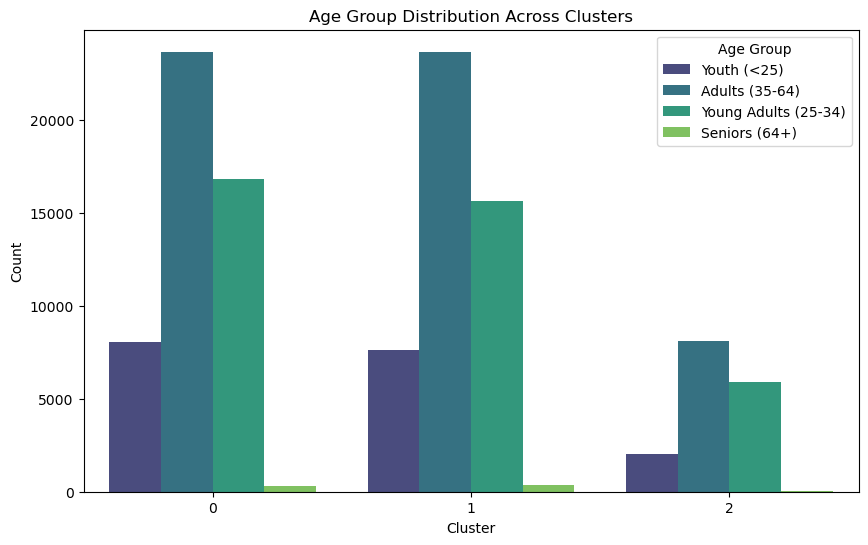

In [162]:
# Visualize age group distribution by cluster
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.countplot(data=data, x='Cluster', hue='Age_Group', palette='viridis')
plt.title("Age Group Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Age Group")
plt.show()

The chart illustrates the distribution of age groups across three clusters, showing that Adults (35-64) and Young Adults (25-34) dominate all clusters, with minimal representation from Youth (<25) and Seniors (64+). Cluster 2 shows a slightly higher proportion of Young Adults compared to the other clusters, indicating a potential demographic shift. The low presence of Youth and Seniors suggests the business offerings may be less appealing to these groups. To improve inclusivity, strategies could focus on engaging these underrepresented demographics while tailoring marketing efforts to the dominant age groups.

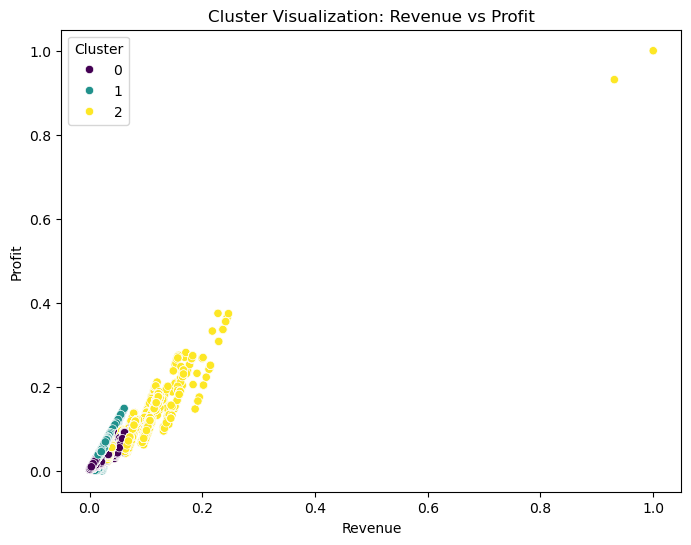

In [166]:
# Visualize clusters using Revenue vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Revenue', y='Profit', hue='Cluster', palette='viridis')
plt.title("Cluster Visualization: Revenue vs Profit")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.legend(title="Cluster")
plt.show()

The scatterplot visualizes the relationship between Revenue and Profit across clusters. Each cluster exhibits distinct patterns, with most data points concentrated at lower Revenue and Profit levels, indicating common characteristics among customers. Cluster separation suggests varying profitability and revenue-generating potential, highlighting opportunities for tailored strategies to optimize performance in each segment.

## Evaluate Model Performance

In [168]:
# Calculate silhouette score to assess cluster quality
silhouette_avg = silhouette_score(X[features], X['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}")

Silhouette Score for k=3: 0.60


A silhouette score ranges from -1 to +1, where values closer to +1 suggest well-defined clusters with clear separation, while values near 0 imply overlapping or ambiguous clusters. A silhouette score of 0.60 for k=3 indicates a good clustering result, with moderate separation and cohesion between clusters. This score suggests that the clusters are reasonably distinct and well-formed.

## Save Results

In [170]:
# Save the dataset with cluster labels
data.to_csv("Segmented_Customers.csv", index=False)
print("Segmented dataset saved as 'Segmented_Customers.csv'.")

Segmented dataset saved as 'Segmented_Customers.csv'.
